# Part I - Ford GoBike System Data <a id=topic0></a>
## by Chisom Urom

## Content Outline 

- [Preliminary Wrangling](#topic1)
- [Assessing and Cleaning Issues](#topic2)
- [Univariate Exploration](#topic3)
- [Bivariate Exploration](#topic4)
- [Multivariate Exploration](#topic5)
- [Conclusions](#topic6)

## Introduction
> This document explores the Ford GoBike System Data which contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> The dataset contains 183, 412 rows for each indivisual ride, and 16 column variable characterising them.

> It contains information on the trips taken like the station name and geographical positioning in latitudes and longitudes. Also, it captures genric information on the user of the bike for the respective trips like the age, gender and the type of user: Subscriber or Customer.

> The following variables are contained in the dataset:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer)


## Preliminary Wrangling <a id=topic1></a>

> I will perform some preliminary wrangling to clean and ready the data for use in the exploratory analysis.

In [52]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [53]:
# read csv file into dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

# get high level overiew of dataset
print(bike_df.shape)
print(bike_df.dtypes)
bike_df.head()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [54]:
bike_df.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
24231,134,2019-02-25 18:40:45.6810,2019-02-25 18:43:00.0390,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,258.0,University Ave at Oxford St,37.872355,-122.266447,4789,Subscriber,1998.0,Male,No
42662,1165,2019-02-22 17:09:55.9830,2019-02-22 17:29:21.6200,370.0,Jones St at Post St,37.787327,-122.413278,124.0,19th St at Florida St,37.760447,-122.410807,5570,Subscriber,1997.0,Female,No
110121,999,2019-02-12 18:06:42.7040,2019-02-12 18:23:22.1380,10.0,Washington St at Kearny St,37.795393,-122.404770,56.0,Koshland Park,37.773414,-122.427317,4942,Subscriber,1997.0,Male,No
157847,75,2019-02-05 20:32:18.0690,2019-02-05 20:33:33.9340,182.0,19th Street BART Station,37.809013,-122.268247,337.0,Webster St at 19th St,37.806970,-122.266588,3049,Subscriber,1987.0,Male,No


In [55]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [56]:
# inspect for duplicate entries
bike_df.duplicated().sum()

0

In [57]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Assessing and Cleaning Issues <a id=topic2></a>
- Max value for `duration_sec` appears outrageous (about 23 hours)
- Incorrect Datatypes for `start_time` and `end_time` columns
- Missing values in `member_birth_year`, `member_gender`, `start_station_name`, and `end_station_name` columns
- Some columns in the dataset are extraneous
- Columns of different observations unit types in one table

In [58]:
# make a copy of the dataframe before cleaning
bike = bike_df.copy()

### Define
Correct the datatypes for the start_time and end_time columns

In [59]:
# convert the datatypes to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [60]:
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Define 

Drop rows with missing values

In [61]:
bike.dropna(inplace =True)

In [62]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Define

Confirm that the max vaue for duration_sec column is indeed correctly calculated

In [63]:
max_value = bike.duration_sec.max()

# isolate the row for which the duration is equal to the max_value
max_row = bike[bike.duration_sec == max_value]

# confirm that the original  entry is correct
print(f"The maximum number of seconds is: {int((max_row.end_time - max_row.start_time).dt.total_seconds().values[0])}  = {max_value}")

The maximum number of seconds is: 84548  = 84548


### Define
Remove columns from dataset that wouldn't be necessary for our analysis

In [64]:
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [65]:
# drop the unnecessary columns
ext_columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip']
bike.drop(columns=ext_columns, inplace=True)

In [66]:
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender'],
      dtype='object')

### Define
Create a table for the user's info and one for the trip information

In [67]:
# create a dataframe for the user's information
user_list = ['bike_id', 'user_type', 'member_birth_year', 'member_gender']
user = bike[user_list]

# create dataframe for the bike trip info
trip_list = ['bike_id', 'duration_sec', 'start_time', 'end_time', 'start_station_name', 'end_station_name']
trip = bike[trip_list]

In [68]:
user.head()

,bike_id,user_type,member_birth_year,member_gender
0,4902,Customer,1984.0,Male
2,5905,Customer,1972.0,Male
3,6638,Subscriber,1989.0,Other
4,4898,Subscriber,1974.0,Male
5,5200,Subscriber,1959.0,Male


In [69]:
trip.head()

,bike_id,duration_sec,start_time,end_time,start_station_name,end_station_name
0,4902,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St
2,5905,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St)
3,6638,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St
4,4898,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St
5,5200,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny


In [70]:
bike.shape

(174952, 9)

### What is the structure of your dataset?

> Following the wrangling process, there are 174, 952 individual rides to and from different stations with 9 variables describing the features of the each ride. Most variables are numeric occuring in both float and integer types, but strings and date type variables are present as well. 
I have divided the dataset into two tables to conform with tidiness standards. The `trip` table contains information on the each trip taken with a bike, while the `user` table carries information on the  user for each trip. I also dropped 8, 460 rows with missing values.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in finding out the features that best predict the pattern and rate of use of bikes in the bike share system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Chiefly, I expect that the `duration_sec` measuring bike-journey time from station to station to influence the bike use. Hence, for shorter distances (shorter durations) there should be more bike use.

> Similarly, I expect the user type to influence user behavior and rate of bike use. The age and gender could also be indicative of a pattern of usage to some degree.

## Univariate Exploration <a id=topic3></a>

To begin with, I would like to see the distribution of the duration of each use for rides taken

In [71]:
plt.rcParams['figure.figsize'] = (7,5)

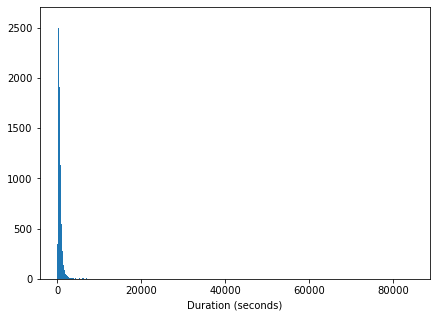

In [72]:
bins = np.arange(61, 84548+10, 10)
# make a frequency distribution for the durations
plt.hist(data = trip, x= 'duration_sec', bins=bins)
plt.xlabel('Duration (seconds)');

From the above plot, it is difficult to observe changes in both shorter durations and longer ones alike. Hence, I'll perform an axis transformation to capture these values.

In [ ]:
bins = np.arange(61, 84548+20, 20)
ticks = [30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5]
tick_text = ['30', '100', '300', '1K', '3K', '10K', '30K', '100K']
plt.hist(data = trip, x= 'duration_sec', bins=bins)
plt.xscale('log')
plt.xlabel('Duration (seconds)')
plt.xticks(ticks, tick_text);

With the log scale on the x axis, the distribution is more clearly shown. The graph looks unimodal and has most of the duration in lower ranges, mostly below 1000 seconds. It presents a skew to the right, however, there is still a tail that trails higher values further. As a result, outliers are expected to the far right of the graph including the maximum value of 84548 seconds seen earlier. I strongly expect this to be the major outlier since the duration at the 75th percentile was only 789 seconds.


Next, I'm interested in how much difference there is usage of bikes based on gender.

In [ ]:
colour = sns.color_palette()[0]
sns.countplot(data = user, x= 'member_gender', order = user.member_gender.value_counts().index, color = colour);

It is apparent that males had a lot more use of the bikes than females.

However, some users were subscribers while others were customers. I'd like to know who had more use of the bikes.

In [ ]:
# values = 
sns.countplot(data = user, x='user_type', color = colour, order = user.user_type.value_counts().index);

Subscribers expectedly had a much greater use for the bikes than the Customers.

Now, I'll turn to compare how the rides were distibuted across the days and months in that year. Were there any notable variations?

In [ ]:
trip.head()

In [ ]:
# first, create columns to record the day and month names for each ride from start_time column
trip['day_name'] = trip.start_time.dt.day_name()
trip['month_name'] = trip.start_time.dt.month_name()

# next, order the day_name and month_name columns in categorical format
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
def make_category(df, ordering):
    '''quick function to make order for ordinal categorical variables'''
    set_order = pd.api.types.CategoricalDtype(ordered=True, categories=ordering)
    return df.astype(set_order)
trip.day_name = make_category(trip.day_name, day_order)
trip.month_name = make_category(trip.month_name, month_order)

In [ ]:
# Now, visualise the distribution across the days of the week
sns.countplot(data=trip, x='day_name', color=colour)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Amount of rides per Day');

Here the use of the bikes per day seemed fairly even across the week days, however, it fell drastically on the weekends. This is indicative that there are less people moving between train stations making use of bike share systemon weekends.

#### For distribution by month:

In [ ]:
# only recordings for the month of February were contained in the dataset.
trip.month_name.value_counts()

Here, only records for the month of February were contained in the dataset.

Now I'd like to know the most frequent start stations, end stations and start to end trip combination.

In [ ]:
# obtain the most frequent start stations
start_stations = trip.start_station_name.value_counts(ascending=True).tail()

# make a plot depicting the information
start_stations.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Station')
plt.title('Most Frequent Start Stations')
plt.xticks(rotation=90);

In [ ]:
# obtain the most frequent end stations
end_stations = trip.end_station_name.value_counts(ascending=True).tail()

# make a plot depicting the information
end_stations.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Station')
plt.title('Most Frequent End Stations');

I've created this plot since its often beneficial to know where most of the user are headed off to and from where. It's also interesting to see that almost all of the 5 most frequent start stations are also some of the most frequent end stations.

What's more interesting however, will be to find out the most common route taken between stations. I'll like to see what the most frequent combination of start and end destination was.

In [ ]:
# fins the most frequent combination of start and end destinations
combo = trip.groupby(['start_station_name', 'end_station_name']).size().nlargest(1)
combo

The most frequent start and end destinations were from *`Berry St at 4th St`* to *`San Francisco Ferry Building (Harry Bridges Plaza)`* with 327 trips.

Since we've considered the peak day, I'll look at the distribution of usage by hour across all days. What was the peak hour and were there other close peaks?

In [ ]:
trip['hour'] = trip.start_time.dt.hour
x_tick = np.arange(0, 25, 3)
plt.hist(trip.hour, bins=26)
plt.xticks(x_tick, x_tick)
plt.xlabel('Hour of Day')
plt.ylabel('Count');

The distribution of the hours of use takes a bimodal form. The first peak is around the 8th, while the next peak a little at the 17th hour. My first indication would be pointing to office workers commuting to work, but I'll perfomr further investigations to solidify my inference.

Finally, age could be a factor influencing the use of bikes and I'd like to know exactly how.

In [51]:
# calculate age of each user at time of usage
user_age = trip.start_time.dt.year.unique()[0] -  user.member_birth_year 

# add the user_age series as a column in the user dataframe
user.loc['age'] = user_age

# drop the birth_year column for tidiness
user.drop(columns=['member_birth_year'], inplace=True)

AttributeError: 'DataFrame' object has no attribute 'member_birth_year'

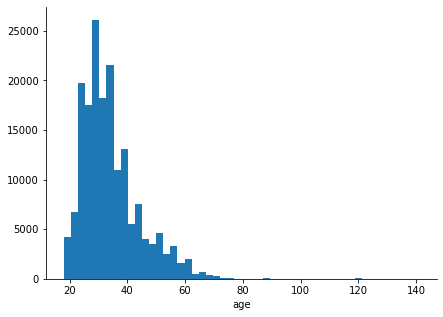

In [34]:
# Extract customers who specified their birth years
df = user[user.age.notnull()]

# visualise the age distributions 
bins = np.arange(df.age.min(), df.age.max()+2, 2)
plt.hist(data = df, x='age', bins =50)
plt.xlabel('age')
sns.despine();

The age distibution looks unimodal and skewed to the right. This shows us that most users were younger and between ages 20 and 40. Use of bikes in the program steadily declined with users above 40. There is also the presence of outliers in the far right, suggesting very old users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The range of values for the duration of use were largely spread out. I performed a log transformation on the data to capture the frequency of occurrence at both small durations and larger ones. Under the transformation, the distriution appeared to be unimodal with a peak around 300 seconds. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During investigation of both the duration and age variables, a few outliers were noted. For the age however, I derived the age column using the difference between the pre-specified users' birth year and when they used the bike (2019). I made my visualisation using this age variable to get a more comprehendable age distribution and not their birth years.

## Bivariate Exploration <a id=topic4></a>

> First, it's interesting to figure out how the duration relates with the age of the user. Typically, I would expect younger users to ride longer periods. Do they?

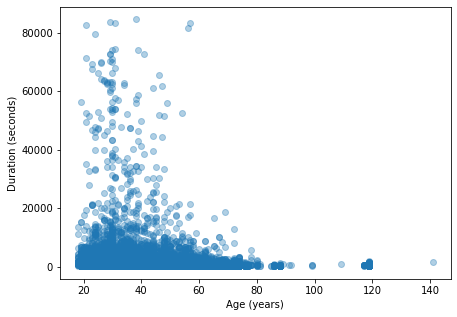

In [35]:
plt.scatter(x=user.age, y=trip.duration_sec, alpha=0.35)
plt.xlabel('Age (years)')
plt.ylabel('Duration (seconds)');

As expected, the plot above shows that the riding duration was highest for younger users. This was particularly the case for users less than 40 years. We can notice a build up of over plotted points between ages 20 to 60, and then many other outliers representing higher durations. However, there is a very weeak correlation between the age and duration. 

Onward, I'd also like to see how long *Subscribers* rode the bikes compared to *Customers* overall.

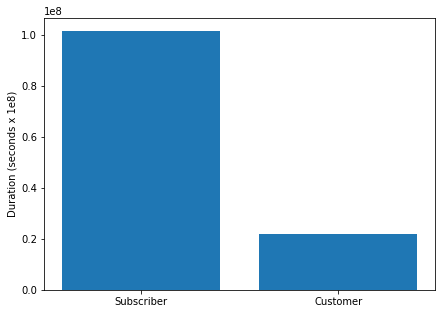

In [36]:
# obtain the total numner of users in each type
user_num = user.user_type.value_counts()

# create a new table joining the users and the duration from previous tables 
user_duration = user[['user_type']]
user_duration = user_duration.join(trip.duration_sec)
duration_num = user_duration.groupby('user_type').sum()
duration_num = duration_num.duration_sec.sort_values(ascending = False)

# make a plot of the total duration for each user type
plt.bar(x = duration_num.index, height= duration_num.values)
plt.ylabel('Duration (seconds x 1e8)'); 

From the above comparison, Subscribers clearly have a longer total duration than Customers. However, this could be attributed to the higher population of subscribers in the dataset. To validate, I'll calculate the average duration for each user type.

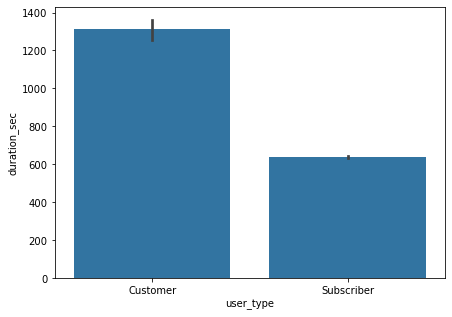

In [37]:
# use a barplot to show mean duration for each user type
sns.barplot(x=user.user_type, y=trip.duration_sec, color=colour);

A simple bar plot shows the mean duration (seconds) covered by each user type. It's pronounced that Customers had more ride-time on average than Subcribers. This is a bit unexpected since Subcribers from our earlier plot were more populated than Customers by headcount. However, the error bar on the Customer barplot suggests the presence of large values in duration that may influence the mean. This suggest that more Subscribers weren't intensively taking long durations trips compared to the Customers.


Earlier, the histogram distribution of usage across the hours of the day showed two peaks around the 8th and 17th hours, and I speculated they could be due to workers commuting. To increase confidence, I would like to see if Subscriber used the bikes more around this period. (Routine need for the service could be a factor responsible for their subscription).

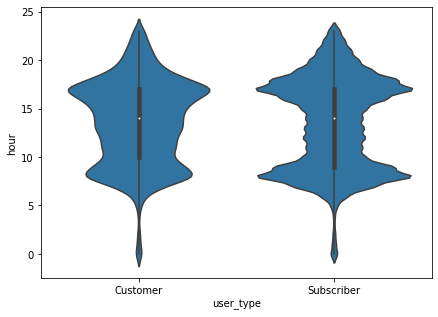

In [38]:
df = pd.DataFrame(user['user_type']).join(pd.DataFrame(trip.hour))
sns.violinplot(data = df, x='user_type', y='hour', color=colour);

The violinplot for Subscribers show the peaks earlier observed around the 8th and 17th hours repectively. The rate of use is fairly low for most other periods but these two. For Customers however, there is also increased activity around the peak hours as well but not comparable to the Subscriber group. I'll eneunciate this difference using a Facted Grid plot.

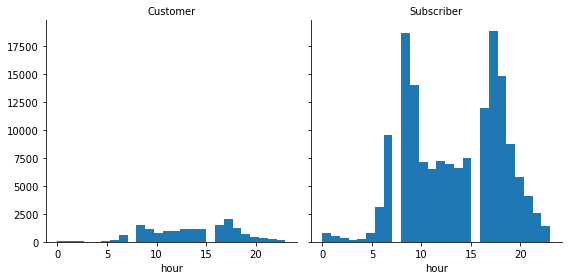

In [39]:
grid = sns.FacetGrid(data=df, col='user_type', height=4)
grid.map(plt.hist, 'hour', bins=26)
grid.set_titles('{col_name}');

The histogram for Subscribers is explicitly bimodal showing the two peak periods. On the other hand, Customers have a fairly evenly distributed plot.
It becomes clearer that Subcribers have a greater amount of recorded use than Customers by the peak hours.

Moving on, I suspect gender may have a benign effect on users' choice to use the bike service. How do the different gender groups compare?

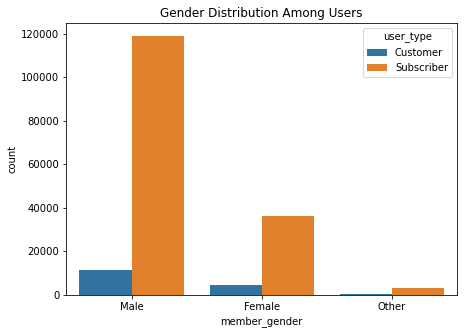

In [40]:
# make a plot to visualise number of user types for each gender
sns.countplot(data = user, x = 'member_gender', hue='user_type', order = user.member_gender.value_counts().index)
plt.title('Gender Distribution Among Users');

It is clear that more males chose to subscribe than any other gender. But I would also like to do a comparative anaysis of what proportion of each gender subscribed.

In [41]:
subdata = user.groupby(['member_gender','user_type']).count()['age']
subdata

member_gender  user_type 
Female         Customer        4623
               Subscriber     36182
Male           Customer       11493
               Subscriber    119007
Other          Customer         450
               Subscriber      3197
Name: age, dtype: int64

In [42]:
total = user.member_gender.value_counts()
# obtain the number of Subcribers for each gender
subdata = user.groupby(['member_gender','user_type']).size()

# loop through the different genders and create list for proportion of subscribers for each
gender = ['Male', 'Female', 'Other']
sub_prop = []
for name in gender:
    sub_prop.append(subdata[name]['Subscriber']/total[name])

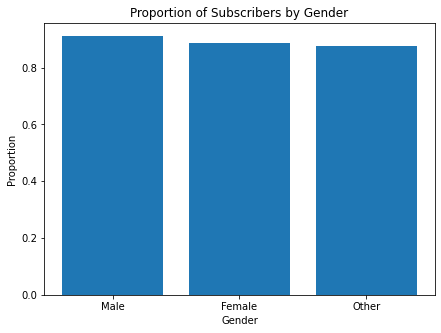

In [43]:
# make a plot to show the proportions of sucscriptions
plt.bar(x=gender, height=sub_prop)
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Subscribers by Gender');

Males had a slightly higher subscription rate than the other genders. However, it is evident that although Males had a higher population, their rate of subscription compared similarly to other two genders.

Now, I would like to know if age was a factor affecting subscription.

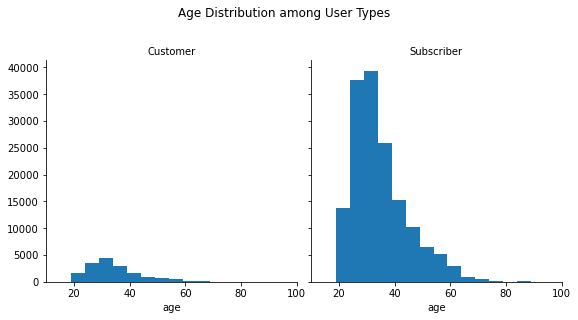

In [44]:
bins = np.arange(14, 141+5, 5)
grid = sns.FacetGrid(data=user, col='user_type', height=4)
grid.map(plt.hist, 'age', bins=bins)
grid.set_titles('{col_name}')
grid.set(xlim=(10, 100))
plt.suptitle('Age Distribution among User Types', x=0.5, y=1.1);

The age as a factor seemed to  affect the general use of the bike share system. I have set the X axis to a smaller limit to zoom in on the main detail. As shown in the chart, more *Subscribers* as well as *Customers* were younger by age. There were few people older than 60 who were Subscribers and Customers alike. Both charts are right skewed which shows a similar decrease in frequency as age increased for both categories. Thus, neither is more favored by the age of users.


Wraping up, I would like to investigate if there is an unsual pattern in days the bikes are used by users based on their type.

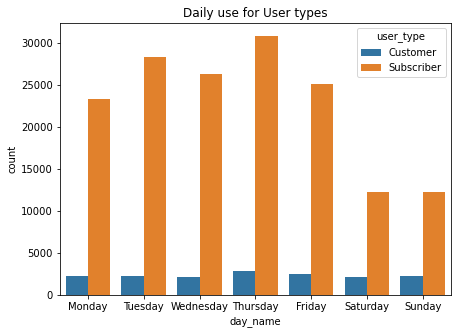

In [45]:
user_day = trip[['day_name']]
user_day = user_day.join(user.user_type)
sns.countplot(data=user_day, x='day_name', hue='user_type')
plt.title('Daily use for User types');

There was a slight rise in the use on thursdays for both Subscribers and Customers. Beside that, the pattern remained generally similar for user types. However, Subscribers were clearly more active during week days with a peak on Thursdays, followed by Tuesday. However, bike use on the weekends was particularly low among subscribers which could indicate that most Subscribers were more frequent user like Office workers commuting.

To look a little into this, I'll inspect how age played on the different days of the week (juxtaposing working ages).

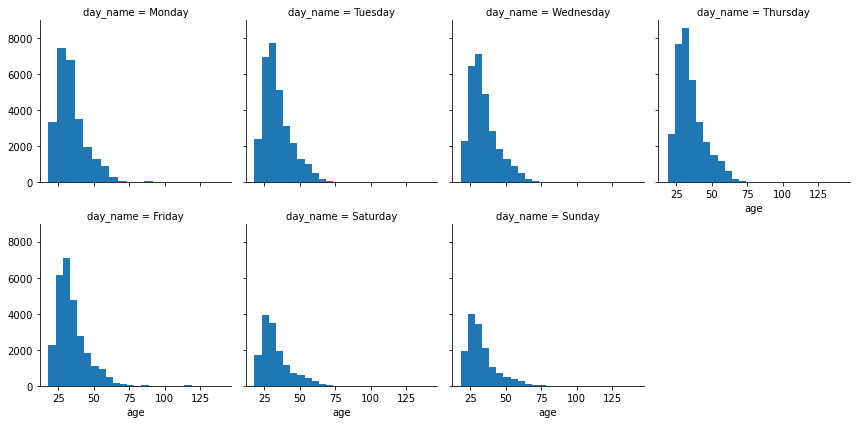

In [46]:
user_day = trip[['day_name']]
user_day = user_day.join(user.age)
grid = sns.FacetGrid(data =user_day, col='day_name', col_wrap=4)
grid.map(plt.hist, 'age', bins=20);

A look at the working age range reveals that the most use was within this range (between 25 and 50). It backs my expectation that most users could possibly fit into job roles. There is also a noticeable decline in bike use for users within this age range.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was a very weak correlation between the age of the users and the duration of the rides they took. However, I intuitively expected the younger riders to take loger rides than older people which was the case. Something unexpected though was that **Customers** who had a lesser population than **Subscribers** had longer durations of usage. Similarly, among the **Genders**, *Males* dominated the user population by head count, yet considering the proportion of subscribed Males, they were only marginally above the other two gender groups (Female and Others).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> An expected relationship was found between the **age** variable and the **duration** of bike use per ride, however, the impact of age on subscription rates was that young people were majorly the users both Subscribed and Customers. Also, the **day** of the week with the most active use was *Thursday* among both subcribed users and other customers. While the weekends saw a rather relaxed engagement from Subscribers, Customers' use remained fairly stable each day.

## Multivariate Exploration <a id=topic5></a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

My exploration focus for this part covers how bike use is affected by the time of day, day of week, the user type and the duration of ride.

First, I'll consider the effect of the peak hours on different user groups on the days of the week.

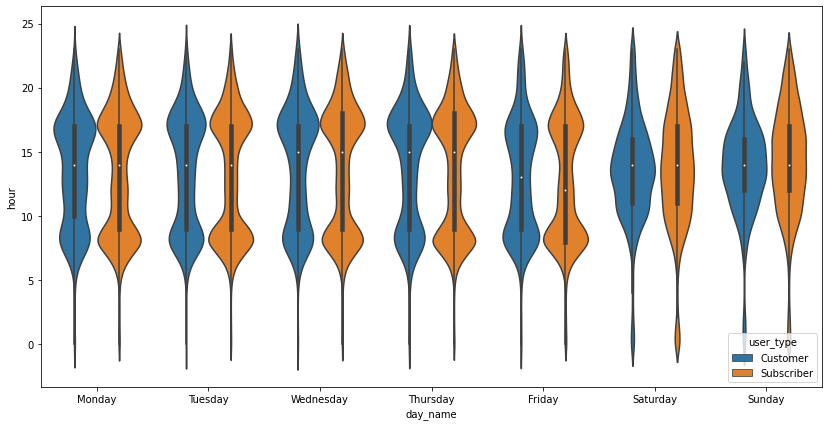

In [47]:
plt.figure(figsize=(14,7))
df = trip[['day_name', 'hour']].join(user.user_type)

sns.violinplot(data = df, x='day_name', y='hour', hue='user_type');

Firstly, we still notice that Subscribers have more utility for the bike during the peak hours particularly on week days. Although Customers share a similar pattern of use, it is more pronounced among subscribers. During the weekends, the rate declines and the pattern changes, the most use comes just once toward the evening at about the 15th hour.

Sicnce users are affected by hour of the day, I'd like to see how the duration of rides relate to user types and different week days. Are there days where people go farther or is the pattern uniform for both user types?

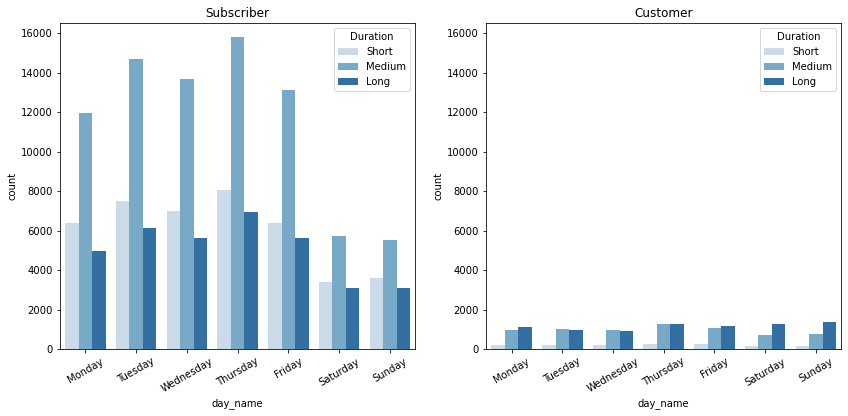

In [48]:
# create categories for the duration variable
# bin size between ranges from the minimun duration, through the first, third and fourth quartile
minimum = trip.duration_sec.min()
median = trip.duration_sec.quantile(0.25)
quartile_3 = trip.duration_sec.quantile(0.75)
maximum = trip.duration_sec.max()
bin_size = [minimum, median, quartile_3, maximum]
label = ['Short', 'Medium', 'Long']
aband = trip.duration_sec.dropna()
trip['timing'] = pd.cut(aband, bins=bin_size, labels=label)

# create a sub-dataframe for the variabels to plot
df = trip[['day_name', 'timing']].join(user.user_type)

# create the plots for each user type
plt.figure(figsize=(14,6))
users = ['Subscriber', 'Customer']
for num in range(len(users)):
    subdata = df[df.user_type == users[num]]
    plt.subplot(1,2,num+1)
    sns.countplot(data = subdata, x='day_name', hue='timing', palette='Blues')
    plt.xticks(rotation=30)
    plt.title(users[num])
    plt.legend(title='Duration')
    plt.ylim(0,16500);

The duration of trips among the Subscriber and Customers on different days are clearly distinctive but siilar within each user-type group. I have grouped the trip durations into Short, Medium and Long categories in the following order
- Miniumum duration to first quartile = `Short`
- First Quartile to third quartile = `Medium`
- Third quartile to maximum duration = `Long`

While more Subscribers used the service for short and medium durations, Customers where more invested in longer duration trips. 

Also, Subscribers had lower use over the wekends than during weekdays but this was slightly different for Customers with higher use toward the weekend. For Customers also, weekends had the most long-duration trips with Sunday topping the chart. Similarly, short duration trips were also lowest on Sunday and Saturday for Customers. 

Since it is a little difficult to make out the exact proportions of bars on the scale above for customers, I plotted the same graph for only Customers this time on its own scale below.

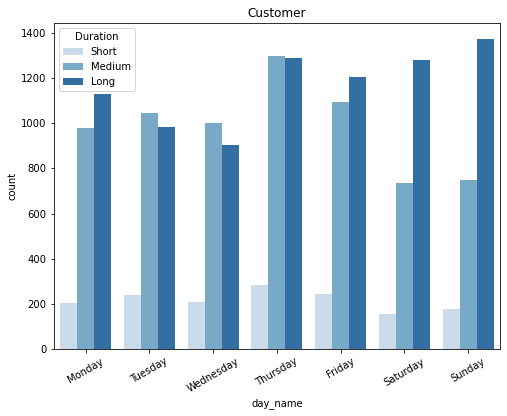

In [49]:
plt.figure(figsize=(8,6))
subdata = df[df.user_type == 'Customer']
sns.countplot(data = subdata, x='day_name', hue='timing', palette='Blues')
plt.xticks(rotation=30)
plt.title(users[num])
plt.legend(title='Duration');

Now it is clearer the number of rides and their durations on diferent days of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This part of my exploration focused on how bike use was affected by the time of day, day of week, the user type and the duration of ride. It was made clear that both Subscribers and Customers had similar use patterns for the hours of the day though the week. However, While the usage pattern was similar by the hour, the duration of trips were different among the user types. Customers were shown to take longer trips than Subscribers through out the week, and though the Subscriber had more trips in general, Customer trips were mostly longer in nature by duration.

### Were there any interesting or surprising interactions between features?

> While Customers (user type) were mostly interested in medium and long duration trips (particularly long), Subscribers were more engaged with short and medium trip durations.

## Conclusions <a id=topic6></a>
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

In my exploration, I found that the general trend in usage of the bike share system was largely predicated on the user-type. As such, Customers generally took longer duration trips than Subscribers. This was initially surprising for Customers to have longer average trip durations than Subscribers, but further analysis revealed that Subscribers were mostly using the service particularly for shorter durations than Customers. 
To obtain this relationship, I grouped the durations into Short, Medium, and Long trips in the following order:

- Miniumum duration to first quartile = `Short`
- First Quartile to third quartile = `Medium`
- Third quartile to maximum duration = `Long`

Furthermore, I found that the peak periods of use varied by day of the week and time of the day, with more Subscribers using the service around the 8th and 17th hour on weekdays but not weekends. Customers however, had a smilar pattern by the hours of each day, but the distribution was more uniform over the hours of the day. This was because Customers had slightly more use during off-peak hours on those weekdays. In my analysis of bike use by the genders, I discovered the Males had a predominant population, but had a similar proportion of subscribed users only marginally higher than Females and the Other genders. 

Outside the main variables of interest, I also discovered that Thursday had the most trips taken, also, the most visted start and end stations were `Market St at 10th St` and `San Francisco Caltrain Station 2  (Townsend St at 4th St)` respectively.
Similarly, I found that most users folowed the route from `Berry St at 4th St` to `San Francisco Ferry Building (Harry Bridges Plaza)` stations, as it was the most frequent trip taken (Start to end).

In summary, here's a walkthrough to highlight analysis and exploration steps and outcome on the bike share system in the Bay area of San Fransisco:

> I found the population of Gender groups using the bikes. A greater population of users were `Males` among the gender groups and `Subscribers` among the user types. Despite the population by head count, the proportion of Subscribed users in each gender was very comparatively similar. 

> I investigated the peak periods over the week in days and hour of day as well. `Thursday` was the most active day in the week for use of the service, and `Customers` had longer trip durations on average than the Subscibers. Also, peak hours across the week was usually around the 8th hour and the 17th on week days, with the 17th being the busiest hour. Weekends on the other hand had lower activity at those times. 


> While `Market St at 10th St` was the most frequent Start Station for users, `San Francisco Caltrain Station 2  (Townsend St at 4th St)` was the most frequent end station. Similarly, moving from `Berry St at 4th St` to `San Francisco Ferry Building (Harry Bridges Plaza)` was the most frequent route taken by users.

> I evealuated the imact of age of choice of Subscription and trip durations. Younger users were revealed to have more trip durations than older ones, however, `age` had no direct effect on whether users subscribed or not. 

> Eventually, the analysis uncovered the surprising relationship between the user type, trip duration and day of week. While Subscribers had lower weekend utility, Customers took the most long-duration trips over the weekends. Explicitly, `Customer` type users were more inclined to take longer trip durations than Subscribed users. Hence, Customers had a higher average duration among the user tyes inspite of `Subscribers` being more populated.

In [50]:
# save the dataset as csv files
bike.to_csv('clean_bike_data.csv', index=False)
user.to_csv('clean_user_data.csv', index=False)
trip.to_csv('clean_trip_data.csv', index=False)

### [Back to Top](#topic0)